In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical

## Load emnist data

In [42]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## extend dimension

In [43]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## use to catagorical for classification

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
geometric = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=13,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8,1.2]
)

In [46]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_train[:50000]])
geo_augmented_labels = y_train[:50000]

augmented_x_train = np.concatenate([
    x_train,
    geo_augmented_images
])

augmented_y_train = np.concatenate([
    y_train,
    geo_augmented_labels
])

In [47]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28, 1)
(10000, 10)
(60000, 28, 28, 1)
(60000, 10)


## augment test data

In [48]:
geo_augmented_images_test = np.array([geometric.random_transform(img) for img in x_test[:5000]])
geo_augmented_lebels_test=y_test[:5000]

augmented_x_test = np.concatenate([
    x_test,
    geo_augmented_images_test
])

augmented_y_test = np.concatenate([
    y_test,
    geo_augmented_lebels_test
])

In [49]:
print(augmented_x_train.shape)
print(augmented_y_train.shape)
print(augmented_x_test.shape)
print(augmented_y_test.shape)

(110000, 28, 28, 1)
(110000, 10)
(15000, 28, 28, 1)
(15000, 10)


Text(0.5, 1.0, '5')

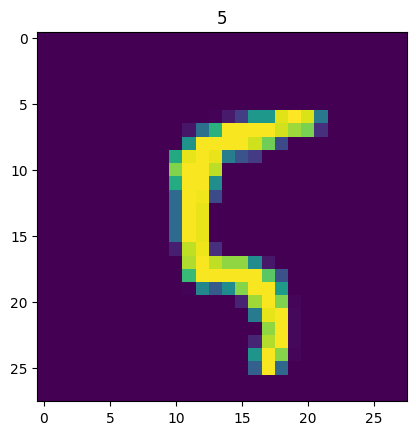

In [50]:
plt.imshow(augmented_x_train[100])
plt.title(f'{np.argmax(augmented_y_train[100])}')

In [51]:
## Normalize

In [52]:
augmented_x_train = augmented_x_train/255
augmented_x_test = augmented_x_test/255

x_train = x_train/255
x_test = x_test/255

In [53]:
## Create model

In [54]:
input = Input(shape=(28,28,1))
x = Conv2D(filters=32, kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

model = Model(input,output)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
print('augmented train data shape', augmented_x_train.shape)
print('augmented test data shape', augmented_x_test.shape)

augmented train data shape (110000, 28, 28, 1)
augmented test data shape (15000, 28, 28, 1)


In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)

In [57]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[early_stop])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.7370 - loss: 0.9539 - val_accuracy: 0.9572 - val_loss: 0.1515
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9579 - loss: 0.1418 - val_accuracy: 0.9707 - val_loss: 0.1048
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9715 - loss: 0.0927 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9754 - loss: 0.0779 - val_accuracy: 0.9780 - val_loss: 0.0794
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9808 - loss: 0.0638 - val_accuracy: 0.9810 - val_loss: 0.0648


Text(0, 0.5, 'loss')

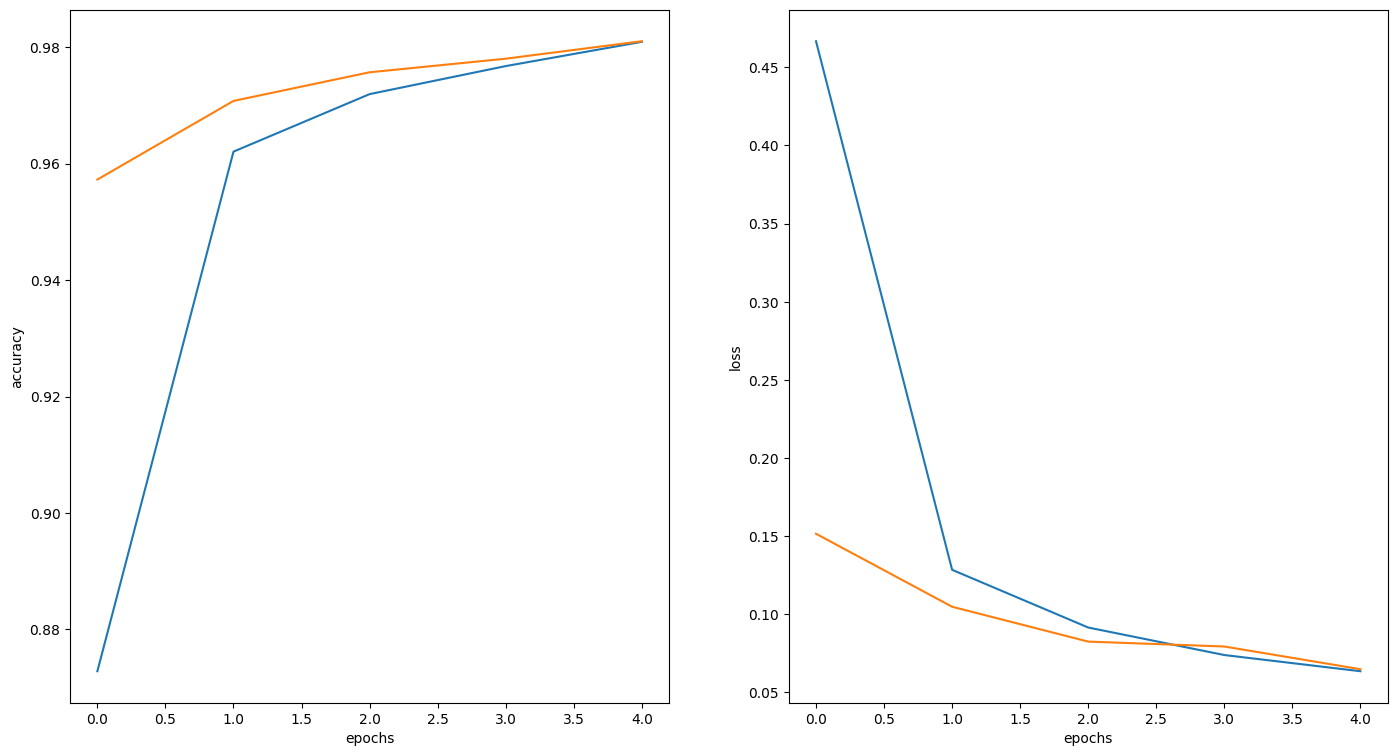

In [58]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

## build non augment model

In [59]:
input = Input(shape=(28,28,1))
x = Conv2D(filters=32, kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

augmented_model = Model(input,output)
augmented_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## compile and run the non augment model

In [60]:
augmented_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
history1=augmented_model.fit(augmented_x_train,augmented_y_train,epochs=20,validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.6708 - loss: 1.0962 - val_accuracy: 0.7088 - val_loss: 0.9041
Epoch 2/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8950 - loss: 0.3412 - val_accuracy: 0.8031 - val_loss: 0.6409
Epoch 3/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9235 - loss: 0.2532 - val_accuracy: 0.8300 - val_loss: 0.5462
Epoch 4/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9374 - loss: 0.2085 - val_accuracy: 0.8539 - val_loss: 0.4818
Epoch 5/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9471 - loss: 0.1770 - val_accuracy: 0.8599 - val_loss: 0.4530


Text(0, 0.5, 'loss')

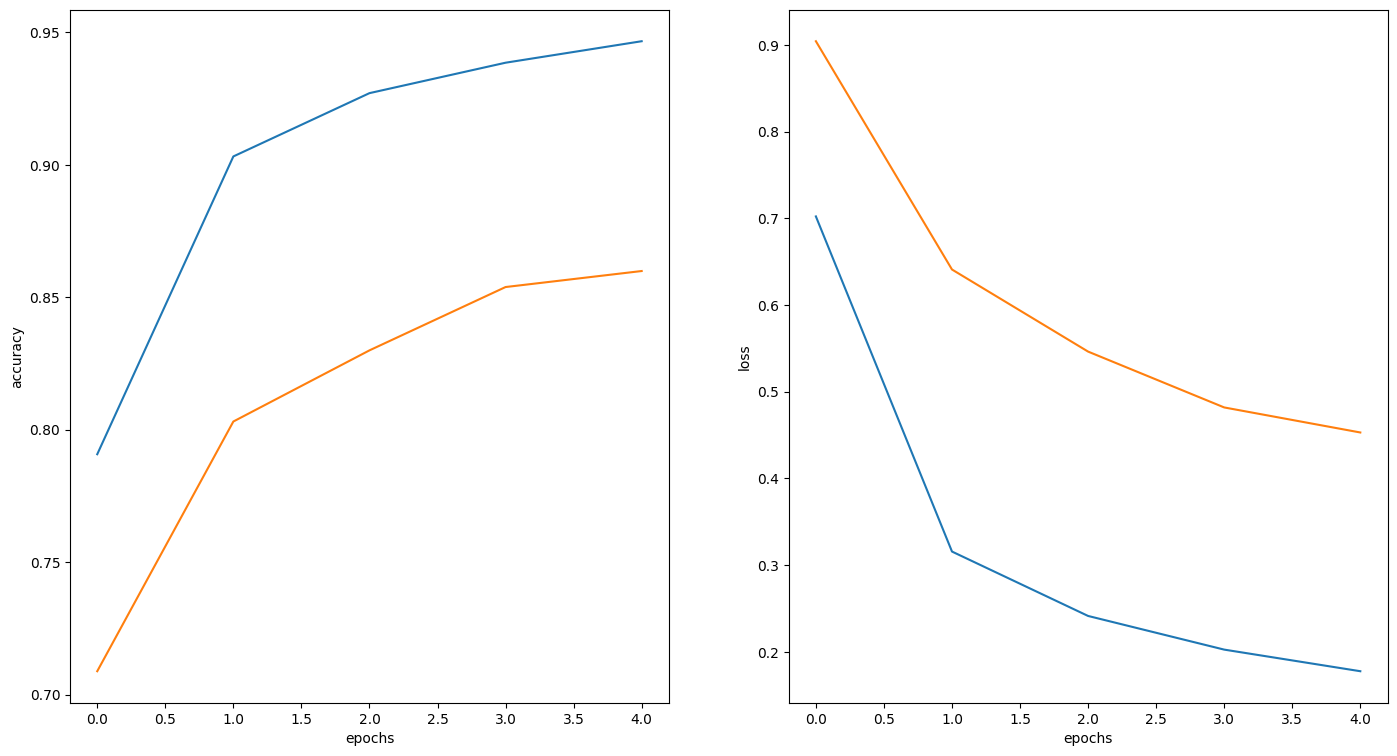

In [61]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

## Performace of augmentation

In [62]:
loss,NMNT_accuracy = model.evaluate(x_test,y_test)
loss3,NMAT_accuracy = model.evaluate(augmented_x_test,augmented_y_test)
loss2,AMNT_accuracy = augmented_model.evaluate(x_test,y_test)
loss1,AMAT_accuracy = augmented_model.evaluate(augmented_x_test,augmented_y_test)

print(NMNT_accuracy)
print(NMAT_accuracy)
print(AMNT_accuracy)
print(AMAT_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9807 - loss: 0.0600
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9462 - loss: 0.2380
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9805 - loss: 0.0663
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9735 - loss: 0.0887
0.984000027179718
0.7975333333015442
0.9832000136375427
0.9405333399772644


In [63]:
import pandas as pd
from tabulate import tabulate

data = {
    'Original Data': [
        f'{NMNT_accuracy*100: .2f}%',
        f'{NMAT_accuracy*100: .2f}%'
    ],
    'Augmented Data': [
        f'{AMNT_accuracy*100: .2f}%',
        f'{AMAT_accuracy*100: .2f}%'
    ]
}

df = pd.DataFrame(data, index=['Model', 'Augmented Model'])
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════════════════╤═════════════════╤══════════════════╕
│                 │ Original Data   │ Augmented Data   │
╞═════════════════╪═════════════════╪══════════════════╡
│ Model           │ 98.40%          │ 98.32%           │
├─────────────────┼─────────────────┼──────────────────┤
│ Augmented Model │ 79.75%          │ 94.05%           │
╘═════════════════╧═════════════════╧══════════════════╛
